In [2]:
# %% [markdown]
# # 02 - PCA Analysis
# ## Dimensionality Reduction for Heart Disease Dataset
# 
# ### Objectives:
# - Apply PCA to reduce feature dimensionality
# - Determine optimal number of components
# - Visualize PCA results


In [4]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib

In [6]:
# Load preprocessed data
X_clean = pd.read_csv('data/heart_disease_cleaned_features.csv')
y_clean = pd.read_csv('data/heart_disease_cleaned_target.csv')['target']
scaler = joblib.load('models/scaler.pkl')

print("Data loaded successfully!")
print(f"Features shape: {X_clean.shape}")
print(f"Target shape: {y_clean.shape}")

Data loaded successfully!
Features shape: (303, 13)
Target shape: (303,)


In [8]:
def perform_pca_analysis(X, y, variance_threshold=0.95):
    """Perform comprehensive PCA analysis"""
    
    # Apply PCA without specifying components first
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Find optimal number of components
    optimal_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    
    print("PCA Analysis Results:")
    print("=" * 50)
    print(f"Original number of features: {X.shape[1]}")
    print(f"Optimal number of components for {variance_threshold:.0%} variance: {optimal_components}")
    print(f"Variance explained by {optimal_components} components: {cumulative_variance[optimal_components-1]:.3f}")
    
    # Plot explained variance
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Individual explained variance
    plt.subplot(1, 3, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
    plt.axvline(x=optimal_components, color='red', linestyle='--', 
                label=f'Optimal ({optimal_components} components)')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Variance Explained by Each PC')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Plot 2: Cumulative explained variance
    plt.subplot(1, 3, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
             'ro-', linewidth=2)
    plt.axhline(y=variance_threshold, color='green', linestyle='--', 
                label=f'{variance_threshold:.0%} variance threshold')
    plt.axvline(x=optimal_components, color='red', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Variance Explained')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Plot 3: Scree plot
    plt.subplot(1, 3, 3)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             pca.explained_variance_ratio_, 'bo-', linewidth=2, label='Individual')
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
             'ro-', linewidth=2, label='Cumulative')
    plt.axvline(x=optimal_components, color='red', linestyle='--')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Apply PCA with optimal components
    pca_optimal = PCA(n_components=optimal_components)
    X_pca_optimal = pca_optimal.fit_transform(X)
    
    # Visualize first two components
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=y, 
                         cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Heart Disease')
    plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]:.2%} variance)')
    plt.title('PCA: First Two Principal Components')
    plt.grid(alpha=0.3)
    
    # 3D plot if we have at least 3 components
    if optimal_components >= 3:
        from mpl_toolkits.mplot3d import Axes3D
        plt.subplot(1, 2, 2, projection='3d')
        scatter = plt.gca().scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], 
                                   X_pca_optimal[:, 2], c=y, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label='Heart Disease')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.gca().set_zlabel('PC3')
        plt.title('PCA: First Three Principal Components')
    
    plt.tight_layout()
    plt.show()
    
    # Component analysis
    print("\nPrincipal Component Analysis:")
    print("=" * 50)
    components_df = pd.DataFrame(
        pca_optimal.components_,
        columns=X.columns,
        index=[f'PC{i+1}' for i in range(optimal_components)]
    )
    
    # Display top 3 features for each component
    print("\nTop 3 features per principal component:")
    for i in range(optimal_components):
        pc_features = components_df.iloc[i].abs().sort_values(ascending=False).head(3)
        print(f"PC{i+1}: {', '.join([f'{feat} ({weight:.3f})' for feat, weight in pc_features.items()])}")
    
    return X_pca_optimal, pca_optimal, optimal_components, components_df

PCA Analysis Results:
Original number of features: 13
Optimal number of components for 95% variance: 10
Variance explained by 10 components: 0.966


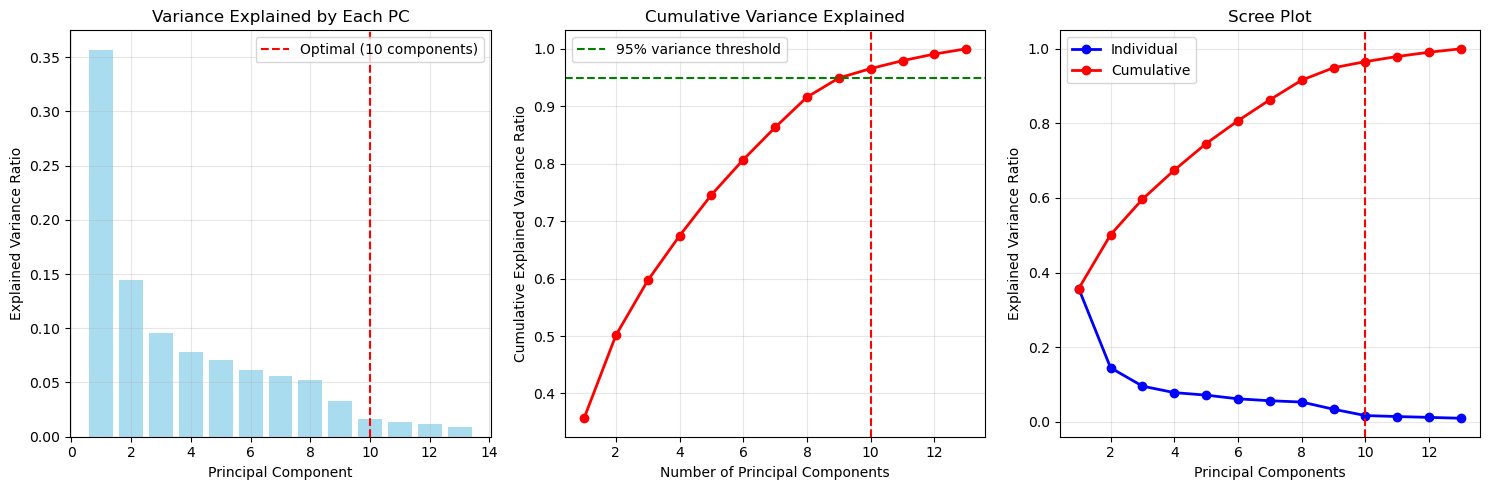

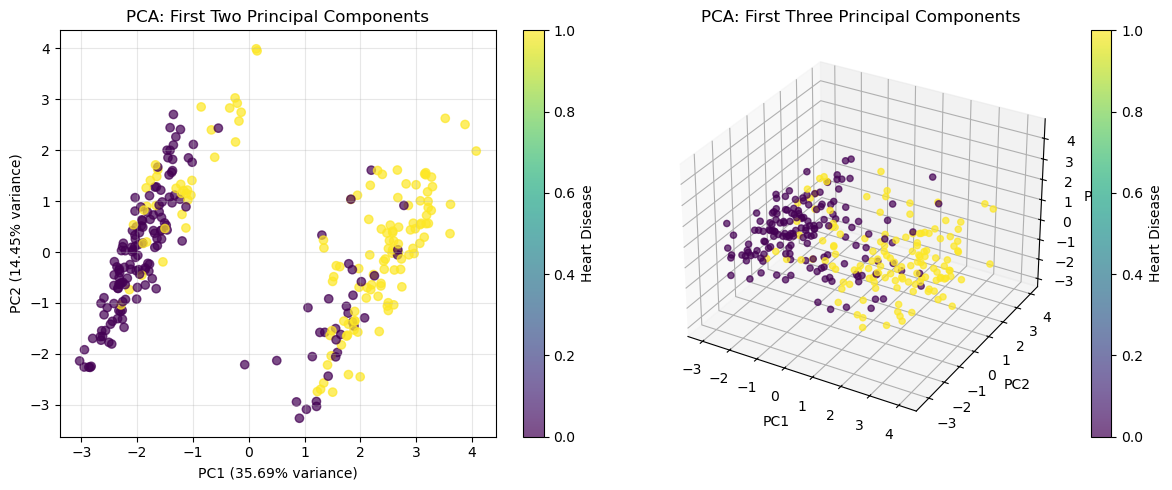


Principal Component Analysis:

Top 3 features per principal component:
PC1: thal (0.872), oldpeak (0.248), thalach (0.221)
PC2: age (0.507), thal (0.404), thalach (0.326)
PC3: trestbps (0.515), thalach (0.476), chol (0.413)
PC4: chol (0.594), trestbps (0.493), cp (0.414)
PC5: restecg (0.744), age (0.431), oldpeak (0.350)
PC6: oldpeak (0.560), chol (0.482), restecg (0.437)
PC7: cp (0.540), ca (0.532), trestbps (0.481)
PC8: ca (0.592), cp (0.462), thalach (0.453)
PC9: age (0.594), thalach (0.546), ca (0.359)
PC10: slope (0.833), sex (0.353), oldpeak (0.339)
PCA analysis completed and saved!
PCA transformed features shape: (303, 10)


In [10]:

# Perform PCA analysis
X_pca, pca_model, n_components, components_df = perform_pca_analysis(X_clean, y_clean)

# %%
# Save PCA results
joblib.dump(pca_model, 'models/pca_model.pkl')
pd.DataFrame(X_pca).to_csv('data/heart_disease_pca_features.csv', index=False)

print("PCA analysis completed and saved!")
print(f"PCA transformed features shape: {X_pca.shape}")